### Packages

In [514]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Added
import statsmodels.formula.api as smf

### Functions

In [516]:
def plot_linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Filter NaN values from specific columns
    #df = df.dropna(subset=[dependent_variable, independent_variable])
    #df = df.reset_index(drop=True)


    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot the distribution of dependent_variable and independent_variable
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[independent_variable], kde=True)
    plt.title(f"Distribution of {independent_variable}")

    plt.tight_layout()
    plt.show()

    # Plot the linear regression line and regression points
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=df, alpha=0.5)
    sns.regplot(x=independent_variable, y=dependent_variable, data=df, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

    plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variable}")
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.legend()
    plt.show()

In [517]:
def linear_regression(df, dependent_variable, independent_variables, categorical_variables=None):
    """
    Function to plot linear regression and distributions.

    Parameters:
    - df: DataFrame
    - dependent_variable: str, the name of the dependent variable
    - independent_variables: list, names of the independent variables (numerical or categorical)
    - categorical_variables: list, names of categorical variables

    """
    # Ensure independent_variables is a list
    if not isinstance(independent_variables, list):
        independent_variables = [independent_variables]

    # Ensure categorical_variables is a list
    if categorical_variables is None:
        categorical_variables = []
    elif not isinstance(categorical_variables, list):
        categorical_variables = [categorical_variables]

    # Filter NaN values from specific columns
    #columns_to_filter = [dependent_variable] + independent_variables + categorical_variables
    #df = df.dropna(subset=columns_to_filter)
    #df = df.reset_index(drop=True)

    # Construct the formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

    # Include categorical variables in the formula
    if categorical_variables:
        categorical_formula = ' + '.join([f'C({var})' for var in categorical_variables])
        formula += f" + {categorical_formula}"

    # Fit the model
    mod = smf.ols(formula=formula, data=df)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())
    
    # Plot the distribution of dependent_variable and independent_variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(independent_variables) + 1, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    for i, variable in enumerate(independent_variables, start=2):
        plt.subplot(1, len(independent_variables) + 1, i)
        sns.histplot(df[variable], kde=True)
        plt.title(f"Distribution of {variable}")

    plt.tight_layout()
    plt.show()

# Data import

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [518]:
# Load datasets
data_folder = './data_cleaned/'
movie_metadata = pd.read_csv(data_folder + 'movie_cleaned.csv', lineterminator='\n')
character_metadata = pd.read_csv(data_folder + 'character_cleaned.csv')

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_1147/132682489.py:3: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv(data_folder + 'movie_cleaned.csv', lineterminator='\n')


# Start Emma

**TMDB vote average**

Having filtered the data so every movie have at least 20 reviews we can now do a linear regression on TMDB vote average and movie release year

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.502
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0339
Time:                        13:21:04   Log-Likelihood:                -15977.
No. Observations:                9894   AIC:                         3.196e+04
Df Residuals:                    9892   BIC:                         3.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.7237      1

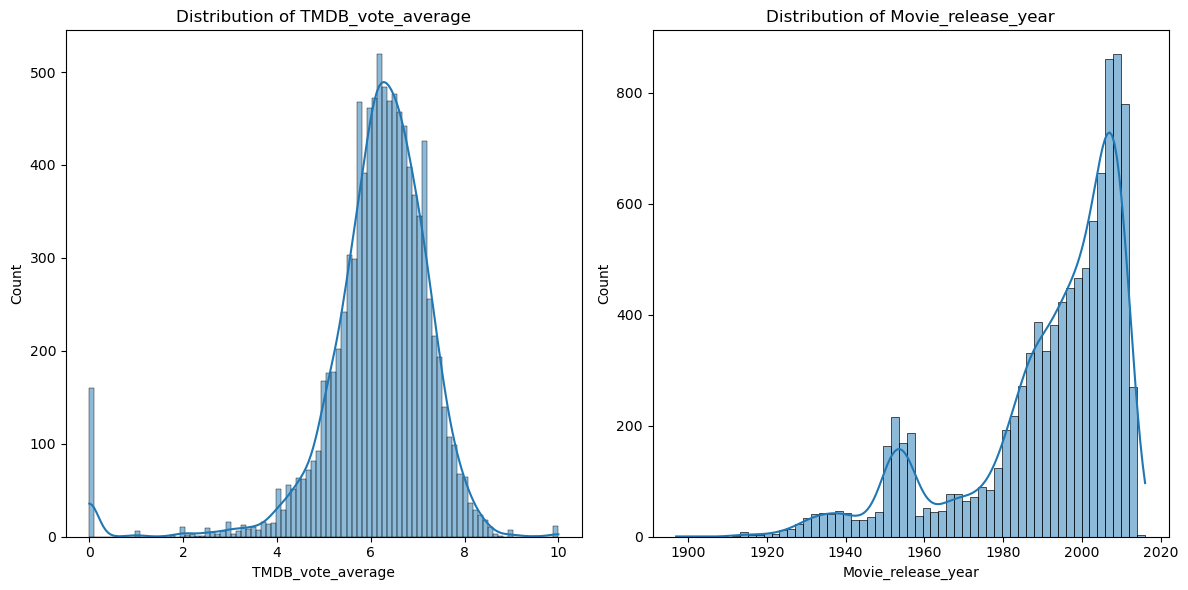

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


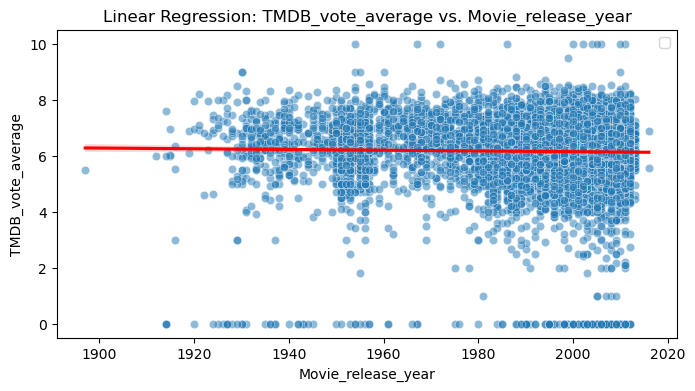

In [533]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_release_year")


**Runtime**



                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     431.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.51e-94
Time:                        13:21:11   Log-Likelihood:                -15606.
No. Observations:                9841   AIC:                         3.122e+04
Df Residuals:                    9839   BIC:                         3.123e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9272      0.060     81.684

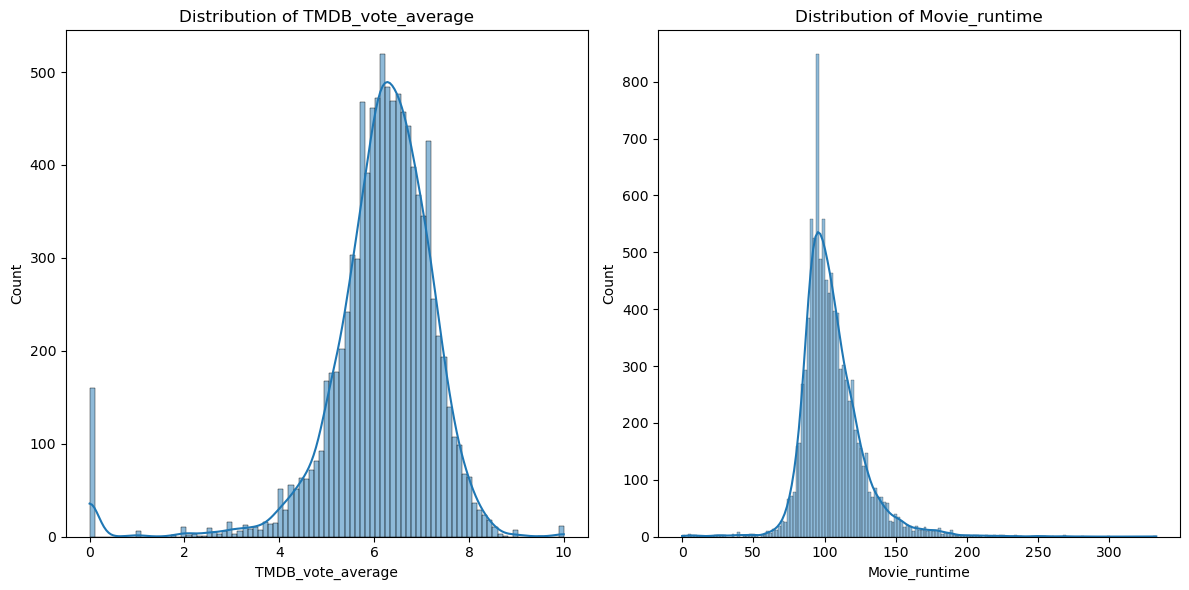

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


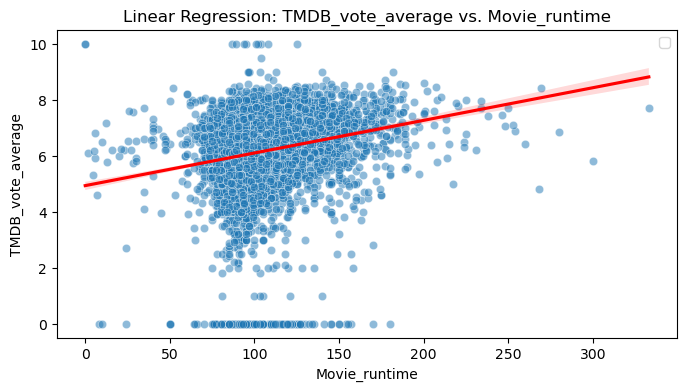

In [542]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_runtime")

**Vote count log**

In [544]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "log_TMDB_vote_count")

LinAlgError: SVD did not converge

**TMDB vote average vs log Movie box office revenue**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.18e-37
Time:                        13:14:43   Log-Likelihood:                -3819.9
No. Observations:                3021   AIC:                             7644.
Df Residuals:                    3019   BIC:                             7656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

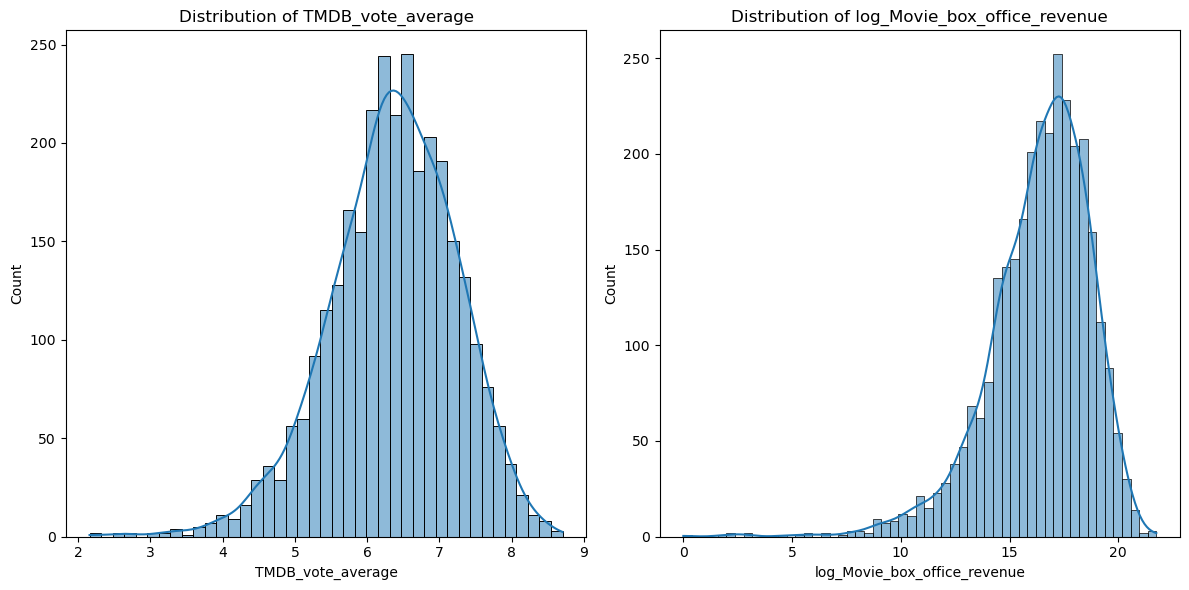

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


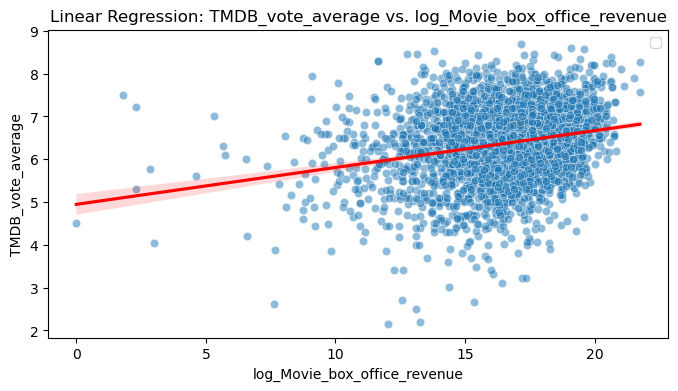

In [ ]:
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_Movie_box_office_revenue")

**Male actor percentage**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.726
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00183
Time:                        13:14:45   Log-Likelihood:                -3775.7
No. Observations:                2942   AIC:                             7555.
Df Residuals:                    2940   BIC:                             7567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.18

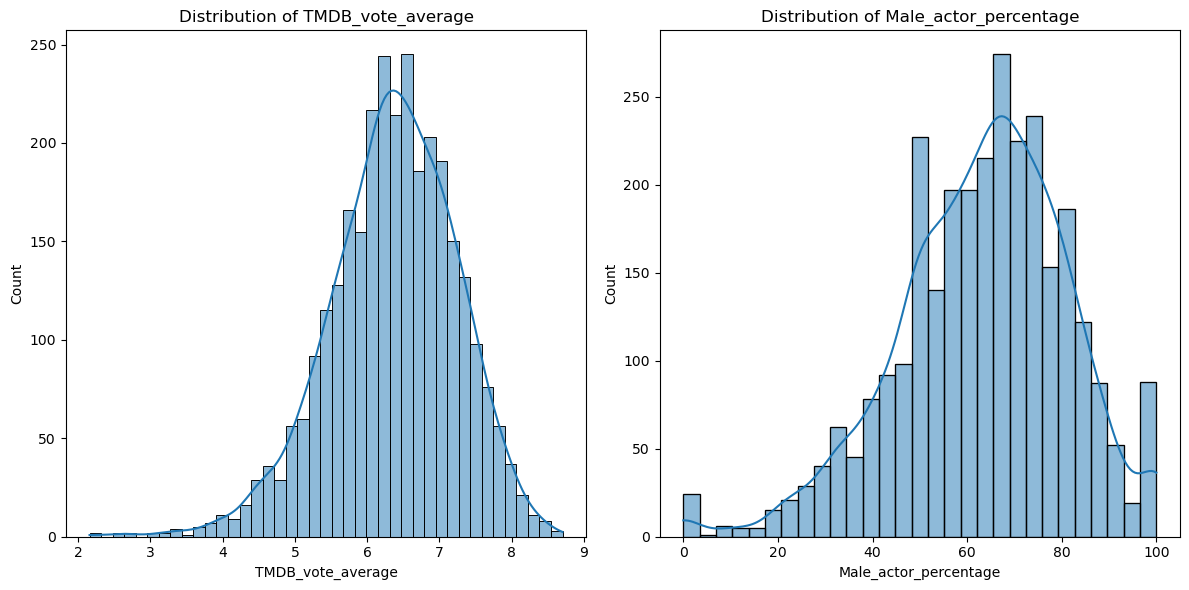

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


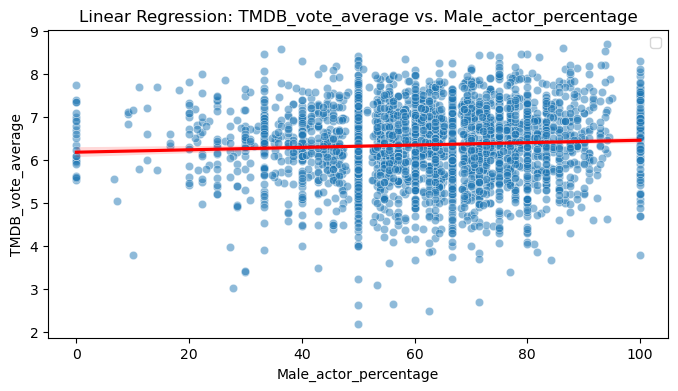

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Male_actor_percentage')

**Average age of actors**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02129
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.884
Time:                        13:14:47   Log-Likelihood:                -3663.6
No. Observations:                2854   AIC:                             7331.
Df Residuals:                    2852   BIC:                             7343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

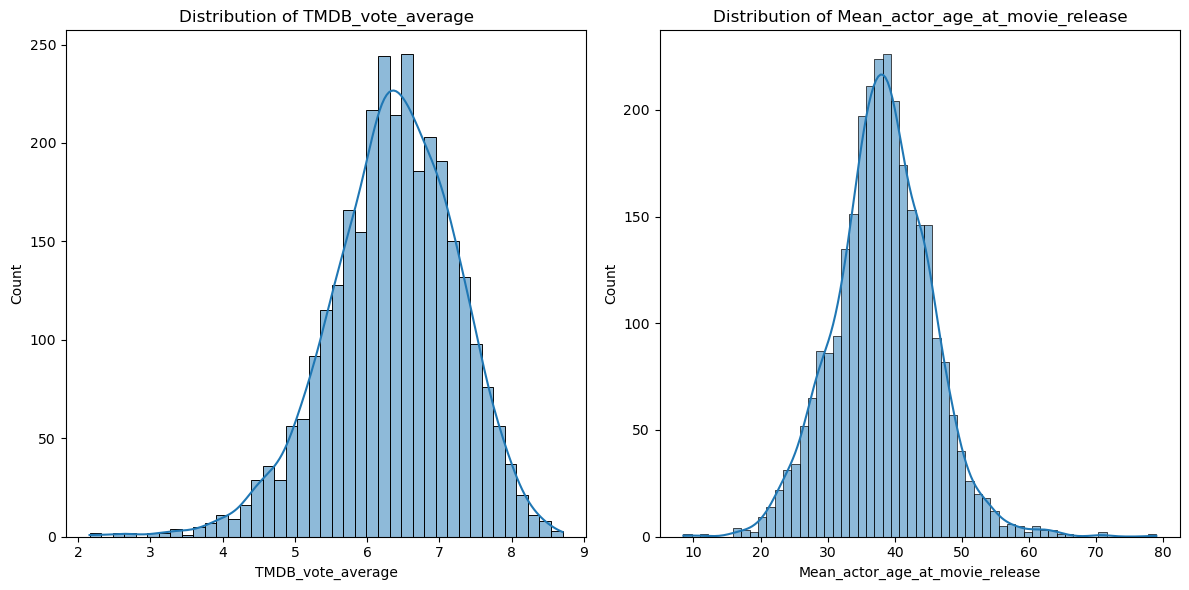

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


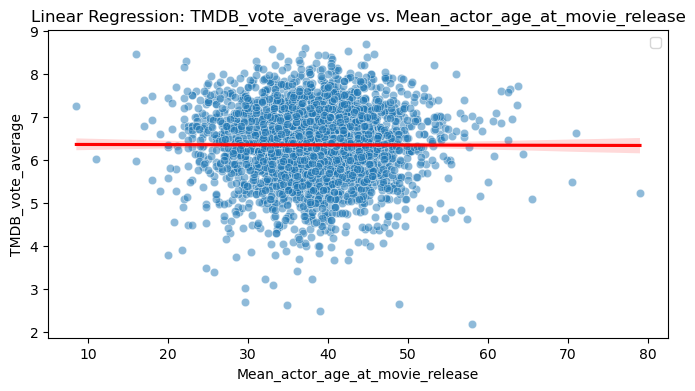

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Mean_actor_age_at_movie_release')